**APRENDIZAJE SUPERVISADO**

**REGRESIÓN LINEAL SIMPLE**

In [4]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

**FASES**

**1. ¿Qué deseamos solucionar?**

Predecir el *salario inicial* de un estudiante recién graduado en función de su *calificación promedio*.

**2. Recolectar los datos**

In [5]:
# Datos
# ==============================================================================
datos = pd.read_csv("ejemplo.csv")
datos

,CALIFICACIÓN PROMEDIO,SALARIO INICIAL
0,2.95,18.5
1,3.20,20.0
2,3.40,21.1
3,3.60,22.4
4,3.20,21.2
5,2.85,15.0
6,3.10,18.0
7,2.85,18.8
8,3.05,15.7
9,2.70,14.4


**3. Entender los datos-Análisis exploratorio de los datos**

**Representación Gráfica y coeficiente de correlación de Pearson**

El primer paso antes de generar un modelo de regresión simple es representar los datos para poder intuir si existe una relación y cuantificar dicha relación mediante un coeficiente de correlación.

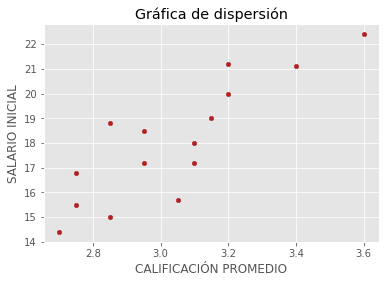

In [8]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots()

datos.plot(
    x    = 'CALIFICACIÓN PROMEDIO',
    y    = 'SALARIO INICIAL',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Gráfica de dispersión');

In [11]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['CALIFICACIÓN PROMEDIO'], y =  datos['SALARIO INICIAL'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.8476342100087885
P-value:  6.59819025231516e-05


A pesar de que la gráfica muestra dispersión, se observa una tendencia lineal del salario inicial en función de la calificación promedio; Además, el coeficiente de correlación de Pearson es $0_{\cdot}8476$ y el *p-value* es significativo para rechazar la hipótesis $H_0: \rho = 0$. Por lo tanto, se supondrá un modelo lineal de la forma:

$$
Y = \beta_0 + \beta_1 x + \varepsilon
$$

donde:
   * Y: es la variable aleatoria respuesta/dependiente (salario inicial).
   * x: es la variable predictora/independiente (calificación promedio).
   * y $\varepsilon$ es el error aleatorio no observable.

In [ ]:
#

**4.Pre-procesar los datos**

**5. Desarrollar modelos preliminares**

In [15]:
# División de los datos en train y test
# ==============================================================================
X = datos[['CALIFICACIÓN PROMEDIO']]
Y = datos['SALARIO INICIAL']
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        Y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo (Entrenamiento)
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [16]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X_train, y_train))

Intercept: [-7.21131985]
Coeficiente: [('CALIFICACIÓN PROMEDIO', 8.31791907514451)]
Coeficiente de determinación R^2: 0.752900429773425


Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test.

In [19]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (RMSE) de test es: {rmse}")


El error (RMSE) de test es: 1.0458686806135336
